In [1]:
import scipy
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

Recatngular approximation:

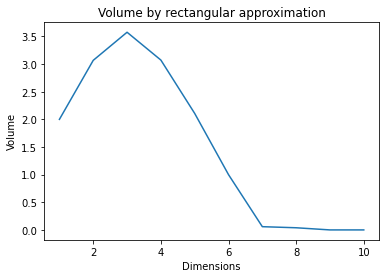

In [2]:
def theta(x):
    s = [i**2 for i in x]
    if(1-np.sum(s) > 0):
        return 1
    else:
        return 0

def RectangularApproximation(N,Np):
    n = int(Np**(1/N))
    pts = np.linspace(-1,1,n)
    a = []
    b = []
    for x in list(itertools.combinations_with_replacement(pts,N)):
        a.append(set(itertools.permutations(x)))
    for i in range(len(a)):
        for j in(a[i]):
            b.append(j)
    count = 0
    for r in b:
        count += theta(r)
    volume = 2**N*count/len(b)
    return volume

Volume = []
for i in range(1,11,1):
    Volume.append(RectangularApproximation(i,10000))
plt.plot(np.arange(1,11,1),Volume)
plt.xlabel('Dimensions')
plt.ylabel('Volume')
plt.title('Volume by rectangular approximation')
plt.show()

Monti Carlo integration:

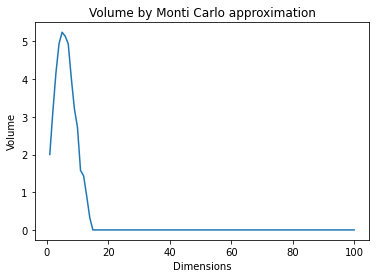

In [19]:
def MontiCarlo(N,n):
    NdimGrid = np.random.random((N,n))
    sum = 0
    for i in range(N):
        sum += NdimGrid[i]**2
    volume = 2**N*np.sum(sum < 1)/n
    return volume

Volume = []
for i in range(1,101,1):
    Volume.append(MontiCarlo(i,100000))
plt.plot(np.arange(1,101,1),Volume)
plt.xlabel('Dimensions')
plt.ylabel('Volume')
plt.title('Volume by Monti Carlo approximation')
plt.show()

Theoretical Volume by recursion:

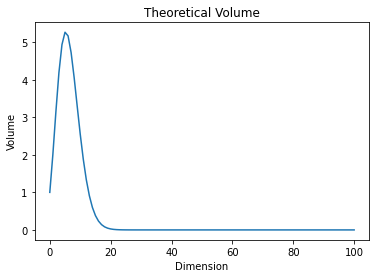

In [20]:
def V(n):
    if (n == 0):
        return 1
    elif (n == 1):
        return 2
    else:
        return 2*np.pi/n*(V(n-2))

Volume = []
n = np.arange(0,101,1)
for i in n:
    Volume.append(V(i))
plt.plot(n,Volume)
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.title('Theoretical Volume')
plt.show()

Power law exponents for rectangulr approximation:

Power Law Exponents
n = 2D, 1/m = 1.938048
n = 3D, 1/m = 2.856497
n = 4D, 1/m = 4.514244
n = 5D, 1/m = 7.042160
n = 6D, 1/m = 13.706384


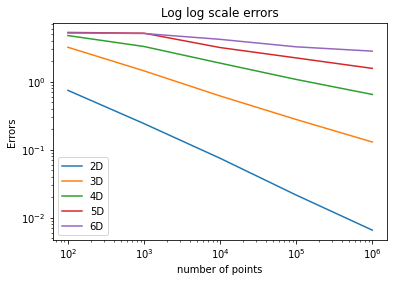

In [21]:
N = np.arange(2,7,1)
Np = [10**i for i in N]
LogNp = [np.log(i) for i in Np]
Error = []
LogError = []
for i in N:
    error = []
    logerror = []
    for j in Np:
        error.append(abs(RectangularApproximation(i,j) - V(i)))
        logerror = [np.log(x) for x in error]
    Error.append(error)
    LogError.append(logerror)

print('Power Law Exponents')
for i in range(len(N)):
    plt.loglog(Np,Error[i],label='{:}D'.format(i+2))
    linreg = scipy.stats.linregress(LogNp,LogError[i])
    print(f'n = {i+2}D, 1/m = {-1/linreg.slope:2f}')
plt.legend()
plt.xlabel('number of points')
plt.ylabel('Errors')
plt.title('Log log scale errors')
plt.show()

The errors in rectangular approximation follows the equation:
\begin{equation} \Delta_d \sim n^{-\frac{a}{d}} \end{equation}
Looking at the exponents, which are the slopes in the linear interpolation of the equation taking 
log on both sides, it matches the predection that as the number of dimension grows, 1/d gets smaller hence we get small negative slopes, which tends towards horizontal line as d gets larger.

Monti Carlo integration:

Power Law Exponents
n = 2D, -m = 1.028698
n = 3D, -m = 0.986262
n = 4D, -m = 0.967318
n = 5D, -m = 0.932315
n = 6D, -m = 0.929869


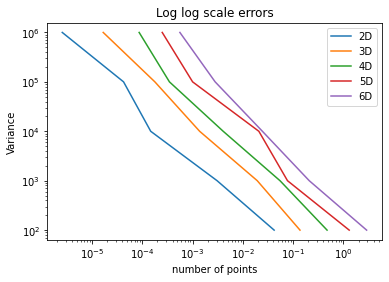

In [26]:
N = np.arange(2,7,1)
Np = [10**i for i in range(2,7)]
LogNp = [np.log(i) for i in Np]
Variance = []
for i in N:
    temp1 = []
    for j in Np:
        temp2 = []
        for k in range(20):
            temp2.append(abs(MontiCarlo(i,j)))
        temp1.append(np.var(temp2))
    Variance.append(temp1)
        
LogVariance = []
for i in range(len(Variance)):
    temp = [np.log(x) for x in Variance[i]]
    LogVariance.append(temp)

print('Power Law Exponents')
for i in range(len(N)):
    plt.loglog(Variance[i],Np,label='{:}D'.format(i+2))
    linreg = scipy.stats.linregress(LogNp,LogVariance[i])
    print(f'n = {i+2}D, -m = {-linreg.slope:2f}')
plt.legend()
plt.xlabel('number of points')
plt.ylabel('Variance')
plt.title('Log log scale errors')
plt.show()

In monte Carlo integration the variance in indeoendent of number of dimension and follows:
\begin{equation} \Delta_{MC} \sim n^{-\frac{1}{2}} \end{equation}
So theoretically, we expect the interpolation after taking log in the equation to be a straight line with equal slopes for all values of d, which is what we get from the computations.   

The inverse of the exponents in the Rectangular approximation is supoosed to be the number of dimension(or possibly scaled by a factor), so looking at the exponents, it already seems to diverge at n = 4D. Buyond n = 5 there dont seem to be any airthematic progression, hence we estimate buyond n = 5 Monti Carlo to be preferable over rectangular approximation. 